In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = 'simulation_num_uavs'
file = glob.glob(str(folder+'/'+'*.txt'))
df = pd.read_csv(file[0], delimiter = ",")

In [3]:
df.head()

,exec_time,NUM_UAVS,MODE,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
0,12382.23,2,unique,False,284,95.04,6.01,56.8
1,12411.37,2,unique,False,293,95.00,6.04,58.6
2,12436.43,2,unique,False,267,95.16,5.95,53.4
3,12469.42,2,unique,False,292,95.00,6.05,58.4
4,12500.75,2,unique,False,364,95.08,5.99,72.8


In [4]:
average = df.groupby('NUM_UAVS').mean()
average

,exec_time,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
NUM_UAVS,,,,,,
2,7657.624,False,320.2,95.056,5.974,64.04
3,7822.316,False,248.9,95.132,8.834,49.78
4,8075.756,False,311.7,95.116,11.306,62.34
5,8330.032,False,133.6,95.084,14.257,26.72
6,8554.180,False,105.7,95.160,16.603,21.14
7,8811.362,False,97.1,95.204,19.153,19.42
8,9104.934,False,85.2,95.136,20.986,17.04


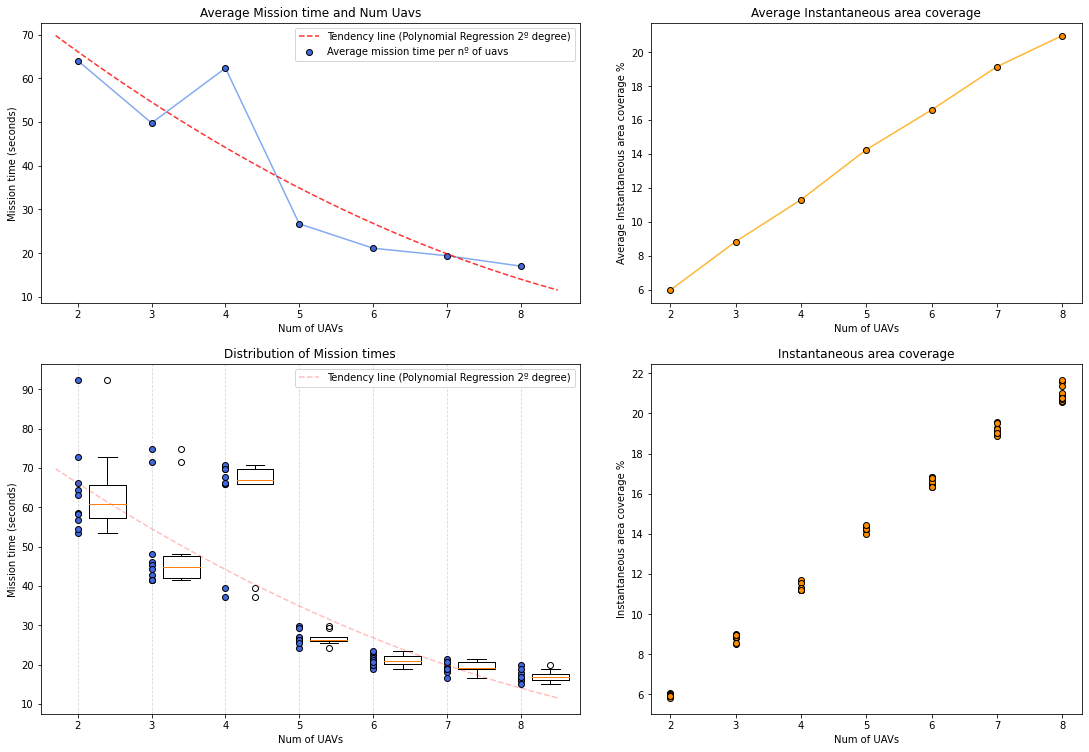

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 11),
                        gridspec_kw={'height_ratios': [4, 5], 'width_ratios': [5,4]})
fig.tight_layout(pad=4.0)

# Mission time plot - averages
axs[0][0].set_title("Average Mission time and Num Uavs")
axs[0][0].set_xlabel("Num of UAVs")
axs[0][0].set_ylabel("Mission time (seconds)")
axs[0][0].scatter(average.index, average['mission_time'],
                  color='royalblue', alpha=1, edgecolor='black', zorder=2,
                  label='Average mission time per nº of uavs')
axs[0][0].plot(average.index, average['mission_time'], color='cornflowerblue', alpha=0.8, zorder=1)

X = list(map(lambda i:[i], average.index))
y = list(map(lambda i:[i], average['mission_time']))
poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
reg = LinearRegression().fit(poly_X, y)
line = np.linspace(1.7,8.5).reshape(-1, 1)
xs = PolynomialFeatures(degree=2, include_bias=False).fit_transform(line)
ys = reg.predict(xs)
axs[0][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.8,
               label="Tendency line (Polynomial Regression 2º degree)")
axs[0][0].set_xlim(1.5,8.8)
axs[0][0].legend()

# Avg instantaneous coverage plot - averages
axs[0][1].set_title("Average Instantaneous area coverage")
axs[0][1].set_xlabel("Num of UAVs")
axs[0][1].set_ylabel("Average Instantaneous area coverage %")
axs[0][1].scatter(average.index, average['average_inst_cov_area'], color='darkorange', alpha=1, edgecolor='black', zorder=2)
axs[0][1].plot(average.index, average['average_inst_cov_area'], color='orange', alpha=0.8, zorder=1)

# Mission time plot - samples distribution - boxplots
axs[1][0].set_title("Distribution of Mission times")
axs[1][0].set_xlabel("Num of UAVs")
axs[1][0].set_ylabel("Mission time (seconds)")
data = list(df.groupby('NUM_UAVS')['mission_time'].apply(list))
data.insert(0,[])
axs[1][0].boxplot(data, positions=list(np.arange(1.4,9.4,1.0)), manage_ticks=False)
axs[1][0].scatter(df['NUM_UAVS'], df['mission_time'], color='royalblue', alpha=1, edgecolor='black', zorder=2)
axs[1][0].grid(axis='x', linestyle='--', alpha=0.5)
axs[1][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.25,
               label="Tendency line (Polynomial Regression 2º degree)")
axs[1][0].set_xlim(1.5,8.8)
axs[1][0].legend()

# Instantaneous area coverage samples distribution
axs[1][1].set_title("Instantaneous area coverage")
axs[1][1].set_xlabel("Num of UAVs")
axs[1][1].set_ylabel("Instantaneous area coverage %")
axs[1][1].scatter(df['NUM_UAVS'], df['average_inst_cov_area'], color='darkorange', alpha=1, edgecolor='black', zorder=2)

plt.savefig('fig.png', dpi=300)
plt.show()